# Lab 6: Linear Regression

***
- **FIRST name**: Abimbola
- **LAST name**: Olarinde
- **Student ID**: 1880229

Leave blank if individual:
- **Collaborator names**:
- **Collaborator student IDs**:
***

In today's lab, you will learn:

1.   The process of making predictions;
2.   linear regression.

For this lab, you'll need the dataset `family_heights.csv`.

### Instructions

- **Collaboration**: You must submit your own work. The collaboration policy for the labs is Consultation Collaboration. You may verbally discuss concepts with your classmates, without exchanging written text, code, or detailed advice. You must develop your own solution and submit your own work. All sources of information used including books, websites, students you talked to, must be cited in the submission. Please see the course FAQ document for details on this collaboration policy. We will adhere to current Faculty of Science guidelines on dealing with suspected cases of plagiarism.
- **Software**: We highly recommend that students use Google Colab for completing labs and assignments. This is the software used by the TAs in the course, and we can guarantee that there will be no issues with incompatible environments or imports.
- **Filling out the Notebook**: You must use this notebook to complete your lab. You will execute the questions in the notebook. The questions might ask for a short answer in text form or for you to write and execute a piece of code. Make sure you enter your answer in either case only in the cell provided.
- **Important**:  Do not use a different cell, do not delete cells, and do not create a new cell. Creating new cells for your code is not compatible with the auto-grading system we are using and thus your assignment will not get grading properly and you will lose marks for that question. As a reminder you must remove the raise NotImplementedError() statements from each question when answering.
- **Rules for Datasets**: Any datasets used in the lab cannot be imported from cloud storage, e.g google drive, and must be read from a file either on your local computer or uploaded to the google colab notebook. Importing from cloud storage will result in a zero.
- **Submission Formatting**: When you are done, you will submit your work from the notebook. Make sure to save your notebook before running it, and then submit on Canvas the notebook file with your work completed. Name your file with your Student ID number, followed by an underscore and L plus the lab number (ex: 1234567_L6.ipynb). Failure to do so will result in your final score being reduced by 50%! Finally your name must be written at the top of the lab or assignment document.

In [137]:
#run this cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Predictions

Predictions are an important part of data science because they allow us to make educated guesses based on incomplete data. These guesses are usually in the form of continuous or categorical values. The primary goal of building a predictive model is to make accurate and reliable forecasts based on historical data.

**Question 1.1.** Load the dataset `family_heights.csv` and assign it to the name `heights`. This dataset contains data on the midparent height and child’s height (all in inches) for a population of 934 adult “children”. The midpoint height is an average of the heights of the two parents.

In [138]:
# YOUR CODE HERE
heights = pd.read_csv('family_heights.csv')
heights

,family,father,mother,midparentHeight,children,childNum,sex,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


In [139]:
# TEST CELL: do not delete!

**Question 1.2.** Use matplot's `scatter` function to make a scatter plot where `midparentHeight` is the x-axis and `childHeight` is the y-axis. Make sure to include the appropriate labels!

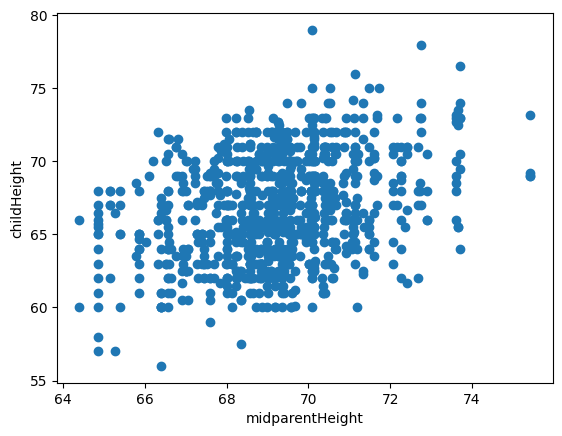

In [140]:
# YOUR CODE HERE
childHeight = heights['childHeight']
midparentHeight = heights['midparentHeight']
# Create a scatter plot
plt.scatter(midparentHeight, childHeight)

# Add labels to the axes
plt.xlabel('midparentHeight')
plt.ylabel('childHeight')

# Show the plot
plt.show()



The reason for studying this data is to be able to predict the adult height of a child born to parents who are similar to those in the dataset. Suppose there's a new couple that wants to predict their child's height. Let the average height of the couple be 70 inches. How would we make a reasonable prediction? </p>

One approach would be to make our prediction based on the parent average around a height of 70 inches, say within .5 inches. The prediction equals the average child's height calculated from those points alone.

**Question 1.3.** Take the parents who have heights between 69.5 and 70.5 inches (inclusive), and compute the average of their children's height. Round your answer to 4 decimal points.

In [141]:
# Filter the DataFrame for parents' heights between 69.5 and 70.5 inches
close_to_70 = heights[(heights['midparentHeight'] >= 69.5) & (heights['midparentHeight'] <= 70.5)]

# Compute the average of their children's height
average_child_height = close_to_70['childHeight'].mean()

# Round the result to 4 decimal points
average_child_height_rounded = round(average_child_height, 4)

average_child_height_rounded

67.2729

In [142]:
# TEST CELL: do not delete!

Run the cell below. The red lines show us the data points considered in our calculation above. The gold point represents our predicted child height based on the parent's height.

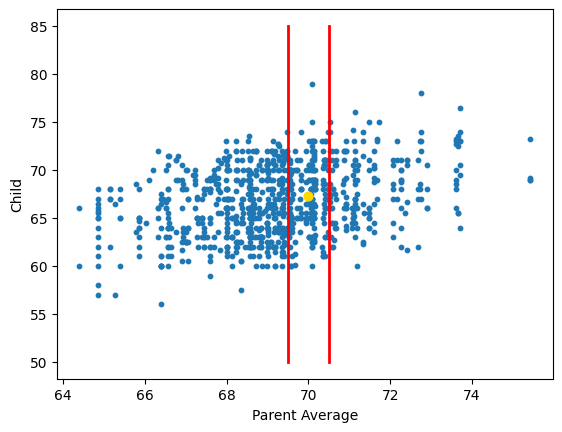

In [143]:
plt.scatter(midparentHeight, childHeight, s=10)
plt.xlabel('Parent Average')
plt.ylabel('Child')

plt.plot([69.5, 69.5], [50, 85], color='red', lw=2)  # plots red vertical lines
plt.plot([70.5, 70.5], [50, 85], color='red', lw=2)
plt.scatter(70, average_child_height_rounded, color='gold', s=40)  # plots gold point

Instead of repeating these steps for each point we'd like to predict, we can implement a function instead!

**Question 1.4.** Implement a function called `predict_child` whose only argument is the average height of the parents. The function should return the predicted height of the child, rounded to four decimal points.

In [144]:
# YOUR CODE HERE
def predict_child(parent_avg_height):
    # Filter the DataFrame for the given range of parent average height
    close_to_avg = heights[(heights['midparentHeight'] >= parent_avg_height - 0.5) & 
                           (heights['midparentHeight'] <= parent_avg_height + 0.5)]
    
    # Compute the average of their children's height
    average_child_height = close_to_avg['childHeight'].mean()
    
    # Round the result to 4 decimal points
    average_child_height_rounded = round(average_child_height, 4)
    
    return average_child_height_rounded

In [145]:
# TEST CELL: do not delete!
### VISIBLE TESTS
assert(predict_child(70) == 67.2729)

We can get a sense of how good our predictions are by comparing the predictions with the data we already have. Let's use our function defined above to calculate the predicted child height of each average couple height.

**Question 1.5.** Write a `for` loop that goes through each average parent height in `heights` and uses the `child_predictions` function to calculate the child's height. Append each answer to the array `child_predictions`.

In [146]:
child_predictions = []

# YOUR CODE HERE
for avg_height in midparentHeight:
    child_height = predict_child(avg_height)
    child_predictions.append(child_height)

# the code below makes a copy of heights and inserts the Predictions column
height_and_prediction = heights.copy()
height_and_prediction.insert(8, "Predictions", child_predictions, True)
height_and_prediction

,family,father,mother,midparentHeight,children,childNum,sex,childHeight,Predictions
0,1,78.5,67.0,75.43,4,1,male,73.2,70.1000
1,1,78.5,67.0,75.43,4,2,female,69.2,70.1000
2,1,78.5,67.0,75.43,4,3,female,69.0,70.1000
3,1,78.5,67.0,75.43,4,4,female,69.0,70.1000
4,2,75.5,66.5,73.66,4,1,male,73.5,70.4158
...,...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0,65.1566
930,203,62.0,66.0,66.64,3,2,female,62.0,65.1566
931,203,62.0,66.0,66.64,3,3,female,61.0,65.1566
932,204,62.5,63.0,65.27,2,1,male,66.5,64.2296


In [147]:
# TEST CELL: do not delete!

To compare two sets of data, we can scatter two plots on the same set of axes *as long as the x-axis is the same for both datasets*.

**Question 1.6.** Scatter the parent average data like you did above, then plot the `Predictions` data that you found. Make sure that both x-axes are the same and include the appropriate labels!

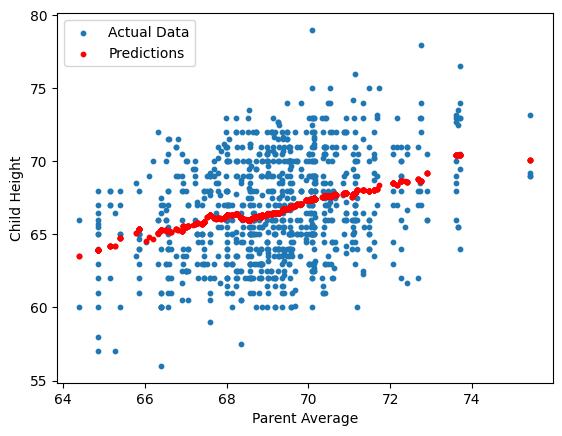

In [148]:
# YOUR CODE HERE

# Scatter plot of the original data
plt.scatter(heights['midparentHeight'], heights['childHeight'], s=10, label='Actual Data')
plt.xlabel('Parent Average')
plt.ylabel('Child Height')

# Scatter plot of the predictions
plt.scatter(heights['midparentHeight'], child_predictions, color='red', s=10, label='Predictions')

# Add legend
plt.legend()

# Show plot
plt.show()

The graph of predictions is called a *graph of averages* because each dot is the average of a vertical strip (like we did in question 1.3.). Notice how the graph of averages roughly follows a straight line. This line is called the *regression line* and is a common method for making predictions.

# 2. Regression Models

You may recall from your stats classes the correlation coefficient, $r$, and how it's used to quantify the linear relationship between two variables. It turns out that  $r$ also helps us identify the straight line about which our datapoints are clustered, making useful for linear regression models.

**Question 2.1.** Use the `corrcoef` function to calculate the correlation coefficient between the predicted data above and the average parent height. Assign your answer to the name `correlation_coefficient`.

In [149]:
# YOUR CODE HERE
# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(heights['midparentHeight'], child_predictions)[0, 1]

correlation_coefficient

0.9732141181326849

In [150]:
# TEST CELL: do not delete!

## Standard Units

Notice that when we calculate $r$, it doesn't use any units. This is because $r$ is based on *standard units*.  To calculate standard units, subtract the mean from the data point and divide by the standard deviation: $$Z = \frac{X - \mu}{\sigma}$$

**Question 2.2.** Create a function that converts an array of numbers to standard units. The function takes one argument which is the original array and returns the converted array. Then, create a new DataFrame that contains the converted data with the columns `MidParent SU` and `Child SU`.   Assign your new DataFrame to `heights_SU`.

In [151]:


def to_standard_units(arr):
    """Convert an array of numbers to standard units."""
    mean = np.mean(arr)
    std = np.std(arr)
    return (arr - mean) / std

# Convert the 'midparentHeight' and 'childHeight' columns to standard units
midparent_height_su = to_standard_units(heights['midparentHeight'])
child_height_su = to_standard_units(heights['childHeight'])

# Create a new DataFrame with the converted data
heights_SU = pd.DataFrame({
    'MidParent SU': midparent_height_su,
    'Child SU': child_height_su
})

heights_SU

,MidParent SU,Child SU
0,3.454652,1.804156
1,3.454652,0.686005
2,3.454652,0.630097
3,3.454652,0.630097
4,2.472085,1.888017
...,...,...
929,-1.424873,-0.767591
930,-1.424873,-1.326667
931,-1.424873,-1.606205
932,-2.185390,-0.068747


In [152]:
# TEST CELL: do not delete!

On this scale, we can calculate our predictions exactly as before. But first we have to figure out how to convert our old definition of “close” points to a value on the new scale. We had said that midparent heights were “close” if they were within 0.5 inches of each other. Since standard units measure distances in units of SDs, we have to figure out how many SDs of midparent height correspond to 0.5 inches.

**Question 2.3.** Calculate how many inches **one** SD of midparent heights is. How many SDs would 0.5 inches be? Assign your answers to `sd_midparent` and `close` respectively.

In [153]:
# YOUR CODE HERE
# # Calculate the standard deviation of midparent heights
sd_midparent = np.std(heights['midparentHeight'])

# Calculate how many SDs 0.5 inches would be
close = 0.5 / sd_midparent

sd_midparent, close


(1.8014050969207576, 0.27756111096536695)

In [154]:
# TEST CELL: do not delete!

**Question 2.4.** Now, make a function like you did in question 1.4. but instead of subtracting and adding 0.5, use your `close` variable that you defined above. Name your function `predict_child_SU` and round your answer to 4 decimal points.

In [155]:
# YOUR CODE HERE
def predict_child_SU(parent_avg_height):
    # Calculate the standard deviation of midparent heights
    sd_midparent = np.std(heights['midparentHeight'])
    
    # Calculate how many SDs 0.5 inches would be
    close = 0.5 / sd_midparent
    
    # Filter the DataFrame for the given range of parent average height using the 'close' variable
    close_to_avg = heights[(heights['midparentHeight'] >= parent_avg_height - close * sd_midparent) & 
                           (heights['midparentHeight'] <= parent_avg_height + close * sd_midparent)]
    
    # Compute the average of their children's height
    average_child_height = close_to_avg['childHeight'].mean()
    
    # Round the result to 4 decimal points
    average_child_height_rounded = round(average_child_height, 4)
    
    return average_child_height_rounded

Write a for loop that iterates through all of `MidParent SU` and uses `predict_child_SU` to predict the child's SU. Append your answers to `child_predictions_SU`.

In [156]:
child_predictions_SU = []

# YOUR CODE HERE
child_predictions_SU = []

# YOUR CODE HERE
for avg_height_su in heights_SU['MidParent SU']:
    child_height_su = predict_child_SU(avg_height_su)
    child_predictions_SU.append(child_height_su)

child_predictions_SU

# the code below makes a copy of heights_SU and inserts the Predictions SU column
height_and_prediction_SU = heights_SU.copy()
height_and_prediction_SU.insert(2, "Predictions SU", child_predictions_SU, True)
height_and_prediction_SU

,MidParent SU,Child SU,Predictions SU
0,3.454652,1.804156,NaN
1,3.454652,0.686005,NaN
2,3.454652,0.630097,NaN
3,3.454652,0.630097,NaN
4,2.472085,1.888017,NaN
...,...,...,...
929,-1.424873,-0.767591,NaN
930,-1.424873,-1.326667,NaN
931,-1.424873,-1.606205,NaN
932,-2.185390,-0.068747,NaN


In [157]:
# TEST CELL: do not delete!

**Question 2.5.** Now make a scatter plot of the SU child data and the SU prediction data (similar to how you did in question 1.6.).

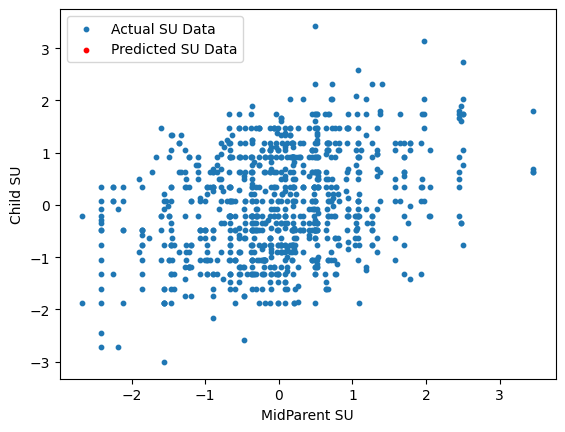

In [158]:
# Scatter plot of the original SU data
plt.scatter(heights_SU['MidParent SU'], heights_SU['Child SU'], s=10, label='Actual SU Data')
plt.xlabel('MidParent SU')
plt.ylabel('Child SU')

# Scatter plot of the SU predictions
plt.scatter(heights_SU['MidParent SU'], child_predictions_SU, color='red', s=10, label='Predicted SU Data')

# Add legend
plt.legend()

# Show plot
plt.show()

Notice how the plotted SU data is the exact same as the original data, only the axes are different. This confirms that we can understand the prediction process using standard units.

# 3. The Regression Line

In regression, we use the value of one variable, $x$, to predict the value of another, $y$. When the variables are measured in standard units, the regression line for predicting based on has slope $$r * \frac{SD_y}{SD_x}$$
 and passes through the origin $$\bar{y} - slope * \bar{x}$$

**Question 3.1.** Write two functions called `slope` and `intercept` that use the equations above. Both functions should have three arguments that take in a Dataframe, label x, and label y.

In [159]:
# YOUR CODE HERE
import numpy as np

def slope(df, x_label, y_label):
    """Calculate the slope of the regression line."""
    x = df[x_label]
    y = df[y_label]
    
    # Compute standard deviations
    sd_x = np.std(x, ddof=0)  # Population standard deviation
    sd_y = np.std(y, ddof=0)
    
    # Compute correlation coefficient
    r = np.corrcoef(x, y)[0, 1]
    
    return r * (sd_y / sd_x)

def intercept(df, x_label, y_label):
    """Calculate the intercept of the regression line."""
    x = df[x_label]
    y = df[y_label]
    
    # Compute mean values
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Get slope
    b = slope(df, x_label, y_label)
    
    return mean_y - (b * mean_x)


In [160]:
#run this cell
family_slope = slope(heights, 'midparentHeight', 'childHeight')
family_intercept = intercept(heights, 'midparentHeight', 'childHeight')
family_slope, family_intercept

(0.6373608969694791, 22.636240549589736)

In [161]:
# TEST CELL: do not delete!

The equation for the regression line is $$estimate\:of\:child's\:height = 0.64 * midParent\:height + 22.64$$ For example, for a midparent height of 70.48 inches, the regression equation predicts the child’s height to be 67.56 inches.

In [162]:
family_slope * 70.48 + family_intercept

67.55743656799862

**Question 3.2.** Write a function called `reg_prediction` that takes in one argument as the parent height average and returns the regression equation that predicts the child's height. Then, use that function and a for loop to calculate the regression predictions. Append your answers to `regression_predictions`.

In [163]:
# YOUR CODE HERE
def reg_prediction(parent_avg_height):
    # Calculate the mean and standard deviation of midparent heights and child heights
    mean_midparent = np.mean(heights['midparentHeight'])
    std_midparent = np.std(heights['midparentHeight'])
    mean_child = np.mean(heights['childHeight'])
    std_child = np.std(heights['childHeight'])
    
    # Calculate the correlation coefficient between midparent heights and child heights
    r = np.corrcoef(heights['midparentHeight'], heights['childHeight'])[0, 1]
    
    # Calculate the regression prediction
    prediction = mean_child + r * (std_child / std_midparent) * (parent_avg_height - mean_midparent)
    
    return round(prediction, 4)

# Calculate the regression predictions
regression_predictions = []

for avg_height in heights['midparentHeight']:
    prediction = reg_prediction(avg_height)
    regression_predictions.append(prediction)

# the code below makes a copy of heights and inserts the Predictions column
height_and_prediction.insert(9, "Regression Predictions", regression_predictions, True)
height_and_prediction

,family,father,mother,midparentHeight,children,childNum,sex,childHeight,Predictions,Regression Predictions
0,1,78.5,67.0,75.43,4,1,male,73.2,70.1000,70.7124
1,1,78.5,67.0,75.43,4,2,female,69.2,70.1000,70.7124
2,1,78.5,67.0,75.43,4,3,female,69.0,70.1000,70.7124
3,1,78.5,67.0,75.43,4,4,female,69.0,70.1000,70.7124
4,2,75.5,66.5,73.66,4,1,male,73.5,70.4158,69.5842
...,...,...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0,65.1566,65.1100
930,203,62.0,66.0,66.64,3,2,female,62.0,65.1566,65.1100
931,203,62.0,66.0,66.64,3,3,female,61.0,65.1566,65.1100
932,204,62.5,63.0,65.27,2,1,male,66.5,64.2296,64.2368


In [164]:
# TEST CELL: do not delete!

**Question 3.3.** Now, make a scatter plot that includes the original child height data, the predicted data, and the regression prediction data.

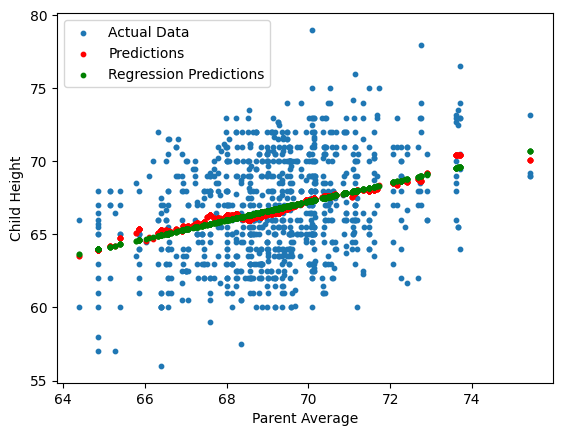

In [165]:
# YOUR CODE HERE
# Scatter plot of the original data
plt.scatter(heights['midparentHeight'], heights['childHeight'], s=10, label='Actual Data')
plt.xlabel('Parent Average')
plt.ylabel('Child Height')

# Scatter plot of the predictions
plt.scatter(heights['midparentHeight'], child_predictions, color='red', s=10, label='Predictions')

# Scatter plot of the regression predictions
plt.scatter(heights['midparentHeight'], regression_predictions, color='green', s=10, label='Regression Predictions')

# Add legend
plt.legend()

# Show plot
plt.show()

# Rubric

| Question | Points|
|----------|----------|
| 1.1.   | 2   |
| 1.2.    | 10   |
| 1.3.    | 10   |
| 1.4.   | 10   |
| 1.5.    | 5  |
| 1.6.   | 12   |
| 2.1.    |5  |
| 2.2.   | 10   |
| 2.3.   | 4   |
| 2.4.    | 10  |
| 2.5.   | 12   |
| 3.1.    | 6  |
| 3.2.   | 10   |
| 3.3.  | 10   |    
| Total:    | 116   |


family_heights: data8